In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import random

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
dataset = pd.read_json("../dataset/nlp/whats-cooking-kernels-only/train.json")
dataset.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [130]:
print(dataset.head())

      id      cuisine                                        ingredients
0  10259        greek  romaine lettuce black olives grape tomatoes ga...
1  25693  southern_us  plain flour ground pepper salt tomatoes ground...
2  20130     filipino  eggs pepper salt mayonaise cooking oil green c...
3  22213       indian                     water vegetable oil wheat salt
4  13162       indian  black pepper shallots cornflour cayenne pepper...


In [4]:
len(dataset)

39774

In [5]:
sample = dataset.ingredients[0]
sample_joined = [" ".join(sample)]
sample_joined

['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles']

In [6]:
dataset.ingredients = [ " ".join(ingre) for ingre in dataset.ingredients]

In [7]:
dataset.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,water vegetable oil wheat salt
4,13162,indian,black pepper shallots cornflour cayenne pepper...


In [8]:
pd.factorize(dataset.cuisine, sort=True)[0]

array([ 6, 16,  4, ...,  8,  3, 13], dtype=int64)

In [9]:
class_names = pd.factorize(dataset.cuisine, sort=True)[1]

In [10]:
class_names

Index(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french',
       'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean',
       'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai',
       'vietnamese'],
      dtype='object')

In [11]:
len(class_names)

20

In [12]:
sentences = dataset.ingredients.to_numpy()
targets = pd.factorize(dataset.cuisine, sort=True)[0]

In [13]:
sentences[0], targets[0]

('romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles',
 6)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_sentences, val_sentences, train_targets, val_targets = train_test_split(sentences, targets, test_size=0.2, random_state=42)

In [16]:
len(train_sentences), len(val_sentences), len(train_targets), len(val_targets)

(31819, 7955, 31819, 7955)

In [17]:
sent_length = [len(text.split()) for text in train_sentences]
sent_length

[27,
 32,
 18,
 15,
 28,
 18,
 14,
 13,
 20,
 22,
 11,
 21,
 24,
 18,
 16,
 15,
 32,
 17,
 10,
 15,
 32,
 12,
 14,
 28,
 22,
 21,
 23,
 37,
 11,
 33,
 29,
 20,
 43,
 31,
 6,
 16,
 8,
 34,
 23,
 13,
 16,
 24,
 17,
 10,
 31,
 26,
 15,
 23,
 9,
 15,
 25,
 4,
 2,
 34,
 17,
 23,
 24,
 18,
 13,
 23,
 47,
 16,
 26,
 5,
 24,
 20,
 32,
 7,
 16,
 22,
 13,
 17,
 21,
 17,
 17,
 27,
 11,
 15,
 28,
 21,
 18,
 22,
 9,
 14,
 24,
 15,
 14,
 40,
 12,
 16,
 17,
 17,
 22,
 24,
 25,
 18,
 11,
 8,
 28,
 22,
 13,
 13,
 9,
 23,
 29,
 38,
 17,
 17,
 35,
 9,
 22,
 25,
 9,
 15,
 17,
 18,
 26,
 9,
 44,
 34,
 19,
 49,
 24,
 21,
 27,
 24,
 32,
 22,
 27,
 21,
 40,
 27,
 17,
 30,
 11,
 18,
 21,
 15,
 13,
 24,
 24,
 21,
 23,
 39,
 42,
 33,
 23,
 30,
 23,
 13,
 13,
 11,
 12,
 34,
 17,
 22,
 12,
 19,
 23,
 26,
 33,
 18,
 21,
 21,
 23,
 14,
 28,
 21,
 9,
 24,
 15,
 22,
 7,
 8,
 13,
 24,
 8,
 14,
 29,
 15,
 6,
 6,
 16,
 28,
 19,
 5,
 17,
 29,
 26,
 26,
 14,
 22,
 9,
 11,
 20,
 9,
 8,
 24,
 29,
 14,
 21,
 29,
 29,
 28,
 14

In [18]:
np.percentile(sent_length, 95)

36.0

In [19]:
max_vocab_length = 3000
max_length = int(np.percentile(sent_length, 98))

text_vectorizor = layers.TextVectorization(max_tokens = max_vocab_length,
                                           output_mode = "int", 
                                           output_sequence_length = max_length)

In [20]:
text_vectorizor.adapt(train_sentences)

In [21]:
len(text_vectorizor.get_vocabulary())

2978

In [22]:
text_vectorizor(sample_joined)

<tf.Tensor: shape=(1, 41), dtype=int64, numpy=
array([[327, 140,  14, 129, 350,  19,   5,   2, 104,  26,  77, 519,  50,
        201,  11, 284,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [23]:
text_embedding = layers.Embedding(input_length=max_length, 
                                  input_dim=len(text_vectorizor.get_vocabulary()), 
                                  mask_zero=True, 
                                  output_dim=128)

In [29]:
text_embedding(tf.cast(text_vectorizor(sample_joined), dtype=tf.float32))

<tf.Tensor: shape=(1, 41, 128), dtype=float32, numpy=
array([[[-0.02145003, -0.04656791,  0.04040828, ...,  0.04227443,
         -0.02694583,  0.02167774],
        [ 0.02558598,  0.03624839, -0.01009692, ...,  0.03964336,
          0.0274214 , -0.02916836],
        [ 0.04052628,  0.0076247 , -0.00761582, ...,  0.0294571 ,
         -0.0483866 ,  0.00366007],
        ...,
        [ 0.04627817,  0.04724158, -0.00278894, ..., -0.01707383,
         -0.01691588, -0.02521149],
        [ 0.04627817,  0.04724158, -0.00278894, ..., -0.01707383,
         -0.01691588, -0.02521149],
        [ 0.04627817,  0.04724158, -0.00278894, ..., -0.01707383,
         -0.01691588, -0.02521149]]], dtype=float32)>

In [30]:
train_sentences_vectorized = tf.cast(text_vectorizor(train_sentences), dtype=tf.float32)
val_sentences_vectorized = tf.cast(text_vectorizor(val_sentences), dtype=tf.float32)

In [31]:
train_sentences_vectorized[0]

<tf.Tensor: shape=(41,), dtype=float32, numpy=
array([ 67., 106.,  11.,  12., 199.,  22.,  26.,  19.,  20.,  10.,  14.,
       129.,  38.,  48.,  17.,  85.,  78.,  19.,  99.,  29.,  69.,   8.,
        45.,  21., 128.,  38.,  65.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)>

In [34]:
train_targets[:5], val_targets[:5]

(array([13,  7,  4, 14, 13], dtype=int64),
 array([ 3, 17,  6,  7,  9], dtype=int64))

In [33]:
def create_performant_features_targets(features, targets, batch_size=32, pre=False, map_func=None, shuffle=False, shuffle_size=None):
    """
    Create a performant dataset for escalating efficiency during training/evaluating a model.

    Parameters:
    - features: numpy array, input features
    - targets: numpy array, target values
    - batch_size: int, batch size for the dataset
    - pre: bool, whether to apply a preprocessing function
    - map_func: function, preprocessing function to be applied if pre=True
    - shuffle: bool, whether to shuffle the dataset
    - shuffle_size: int, size of the shuffle buffer

    Returns:
    - tf.data.Dataset: TensorFlow dataset
    """

    features_tensor = tf.data.Dataset.from_tensor_slices(tf.cast(features, dtype=tf.float32))
    targets_tensor = tf.data.Dataset.from_tensor_slices(tf.cast(targets, dtype=tf.float32))
    dataset_tensor = tf.data.Dataset.zip((features_tensor, targets_tensor))

    if pre:
        dataset_tensor = dataset_tensor.map(map_func=map_func, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        dataset_tensor = dataset_tensor.shuffle(shuffle_size)

    dataset_tensor = dataset_tensor.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset_tensor

In [35]:
train_dataset = create_performant_features_targets(train_sentences_vectorized, train_targets, shuffle=True, shuffle_size=1000)
val_dataset = create_performant_features_targets(val_sentences_vectorized, val_targets)

In [36]:
train_dataset, val_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 41), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 41), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [37]:
# Callbacks

def tensorboard_cb(dirpath, model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join(dirpath, 
                                                       model_name, 
                                                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

def checkpoint_cb(dirpath, model_name, save_format=None, save_weights=False):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(dirpath, model_name + save_format), 
                                              save_best_only=True, 
                                              save_weights_only=save_weights,
                                              monitor="val_loss",
                                              verbose=1)

def early_stopping_cb(patience):
    return tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                            restore_best_weights=True, 
                                            patience=patience,
                                            verbose=1)

def reduce_lr_cb(patience, factor):
    return tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                patience=patience, 
                                                factor=factor, 
                                                min_lr=1e-7,
                                                verbose=1)

def lr_scheduler_cb(lr_init, lr_div):
    return tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr_init * 10 ** (epoch/lr_div))

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

In [60]:
def evaluate_classification_model(y_true, y_preds):
    """
    Evaluate a classification model for binary/multi-class classification.

    Parameters:
    - y_true: 1D array or list of actual values.
    - y_preds: 1D array or list of predicted values.

    Returns:
    - evaluation_results: Dictionary containing evaluation metrics.
    """
    acc = accuracy_score(y_true, y_preds)
    pre, rec, f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted", zero_division=1)
    return {"acc": acc,
            "pre": pre,
            "rec": rec,
            "f1": f1}

In [39]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(41,), dtype=tf.float32)
x = text_embedding(inputs)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

In [40]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 embedding (Embedding)       (None, 41, 128)           381184    
                                                                 
 conv1d (Conv1D)             (None, 39, 64)            24640     
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 64)            12352     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                           

In [41]:
model_1.compile(loss="sparse_categorical_crossentropy",
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam())

model_1_history = model_1.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=30,
                              callbacks=[checkpoint_cb("h5_models/recipe/", model_1.name, save_format=".h5"),
                                         tensorboard_cb("model_logs/recipe/", model_1.name),
                                         early_stopping_cb(patience=5),
                                         reduce_lr_cb(patience=3, factor=0.1)])

Epoch 1/30
995/995 [==============================] - ETA: 0s - loss: 1.9930 - accuracy: 0.4167
Epoch 1: val_loss improved from inf to 1.43472, saving model to h5_models/recipe\model_1.h5
995/995 [==============================] - 14s 6ms/step - loss: 1.9930 - accuracy: 0.4167 - val_loss: 1.4347 - val_accuracy: 0.5558 - lr: 0.0010
Epoch 2/30
988/995 [============================>.] - ETA: 0s - loss: 1.5367 - accuracy: 0.5439
Epoch 2: val_loss improved from 1.43472 to 1.29219, saving model to h5_models/recipe\model_1.h5
995/995 [==============================] - 6s 6ms/step - loss: 1.5360 - accuracy: 0.5439 - val_loss: 1.2922 - val_accuracy: 0.5933 - lr: 0.0010
Epoch 3/30
989/995 [============================>.] - ETA: 0s - loss: 1.4036 - accuracy: 0.5785
Epoch 3: val_loss improved from 1.29219 to 1.19069, saving model to h5_models/recipe\model_1.h5
995/995 [==============================] - 6s 6ms/step - loss: 1.4040 - accuracy: 0.5785 - val_loss: 1.1907 - val_accuracy: 0.6396 - lr: 0.

In [42]:
model_1.evaluate(train_dataset), model_1.evaluate(val_dataset)

249/249 [==============================] - 1s 3ms/step - loss: 0.9972 - accuracy: 0.7074


([0.7551605105400085, 0.7568119764328003],
 [0.9972458481788635, 0.7073538899421692])

In [45]:
model_1_preds = tf.argmax(model_1.predict(val_dataset), axis=1)
model_1_preds

<tf.Tensor: shape=(7955,), dtype=int64, numpy=array([ 3, 13,  6, ...,  3,  7, 16], dtype=int64)>

In [61]:
model_1_results = evaluate_classification_model(val_targets, model_1_preds)

In [62]:
model_1_results

{'acc': 0.7073538654934004,
 'pre': 0.6922691192141853,
 'rec': 0.7073538654934004,
 'f1': 0.6749479894634385}

In [67]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(41,), dtype=tf.float32)
x = text_embedding(inputs)
x = layers.LSTM(60, return_sequences=True)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(50, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2")

In [68]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 embedding (Embedding)       (None, 41, 128)           381184    
                                                                 
 lstm (LSTM)                 (None, 41, 60)            45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                           

In [69]:
CHECKPOINT_PATH = "h5_models/recipe/"
SAVE_FORMAT = ".h5"
LOGS_PATH = "model_logs/recipe/"

In [70]:
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2_history = model_2.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=30,
                              callbacks=[checkpoint_cb("h5_models/recipe/", model_2.name, save_format=".h5"),
                                         early_stopping_cb(patience=5),
                                         reduce_lr_cb(patience=3, factor=0.1),
                                         tensorboard_cb("model_logs/recipe", model_2.name)])

Epoch 1/30
992/995 [============================>.] - ETA: 0s - loss: 1.1474 - accuracy: 0.6704
Epoch 1: val_loss improved from inf to 0.91096, saving model to h5_models/recipe\model_2.h5
995/995 [==============================] - 19s 14ms/step - loss: 1.1463 - accuracy: 0.6705 - val_loss: 0.9110 - val_accuracy: 0.7211 - lr: 0.0010
Epoch 2/30
993/995 [============================>.] - ETA: 0s - loss: 0.8404 - accuracy: 0.7442
Epoch 2: val_loss improved from 0.91096 to 0.83680, saving model to h5_models/recipe\model_2.h5
995/995 [==============================] - 14s 14ms/step - loss: 0.8402 - accuracy: 0.7443 - val_loss: 0.8368 - val_accuracy: 0.7470 - lr: 0.0010
Epoch 3/30
995/995 [==============================] - ETA: 0s - loss: 0.7577 - accuracy: 0.7694
Epoch 3: val_loss improved from 0.83680 to 0.82783, saving model to h5_models/recipe\model_2.h5
995/995 [==============================] - 15s 15ms/step - loss: 0.7577 - accuracy: 0.7694 - val_loss: 0.8278 - val_accuracy: 0.7510 - l

In [71]:
model_2_preds = tf.argmax(model_2.predict(val_dataset), axis=1)
model_2_results = evaluate_classification_model(val_targets, model_2_preds)
model_2_results

{'acc': 0.7595223130106851,
 'pre': 0.7545853140001072,
 'rec': 0.7595223130106851,
 'f1': 0.7534343794787057}

In [72]:
model_2.evaluate(train_dataset), model_2.evaluate(val_dataset)

249/249 [==============================] - 1s 6ms/step - loss: 0.8102 - accuracy: 0.7595


([0.5400679111480713, 0.838272750377655],
 [0.8101825714111328, 0.7595223188400269])

In [73]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(41,), dtype=tf.float32)
x = text_embedding(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3")

In [74]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 embedding (Embedding)       (None, 41, 128)           381184    
                                                                 
 bidirectional (Bidirectiona  (None, 41, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 41, 128)          98816     
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                           

In [75]:
model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3_history = model_3.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=30,
                              callbacks=[checkpoint_cb(CHECKPOINT_PATH, model_2.name, save_format=SAVE_FORMAT),
                                         tensorboard_cb(LOGS_PATH, model_2.name),
                                         early_stopping_cb(patience=5),
                                         reduce_lr_cb(patience=3, factor=0.1)])

Epoch 1/30
995/995 [==============================] - ETA: 0s - loss: 0.9390 - accuracy: 0.7265
Epoch 1: val_loss improved from inf to 0.83101, saving model to h5_models/recipe\model_2.h5
995/995 [==============================] - 58s 46ms/step - loss: 0.9390 - accuracy: 0.7265 - val_loss: 0.8310 - val_accuracy: 0.7529 - lr: 0.0010
Epoch 2/30
995/995 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.8002
Epoch 2: val_loss improved from 0.83101 to 0.82090, saving model to h5_models/recipe\model_2.h5
995/995 [==============================] - 41s 42ms/step - loss: 0.6795 - accuracy: 0.8002 - val_loss: 0.8209 - val_accuracy: 0.7580 - lr: 0.0010
Epoch 3/30
995/995 [==============================] - ETA: 0s - loss: 0.6136 - accuracy: 0.8173
Epoch 3: val_loss did not improve from 0.82090
995/995 [==============================] - 44s 44ms/step - loss: 0.6136 - accuracy: 0.8173 - val_loss: 0.8361 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 4/30
994/995 [===================

In [76]:
model_3_preds = tf.argmax(model_3.predict(val_dataset), axis=1)
model_3_results = evaluate_classification_model(val_targets, model_3_preds)
model_3_results

{'acc': 0.7580138277812697,
 'pre': 0.7543202942099703,
 'rec': 0.7580138277812697,
 'f1': 0.7519019094780828}

In [77]:
model_3.evaluate(train_dataset), model_3.evaluate(val_dataset)

249/249 [==============================] - 4s 16ms/step - loss: 0.8209 - accuracy: 0.7580


([0.5675991177558899, 0.8300386667251587],
 [0.8208966255187988, 0.7580138444900513])

In [78]:
import seaborn as sns

In [80]:
cm = confusion_matrix(val_targets, model_3_preds)
cm

array([[  37,    1,    2,    0,    8,    1,    0,    1,    1,    3,    4,
           1,    0,   11,    0,    1,    9,    2,    2,    0],
       [   0,   66,    2,    2,    0,   11,    0,    2,   14,   20,    5,
           2,    0,    1,    1,    7,   23,    0,    0,    1],
       [   2,    1,  233,    3,    4,    4,    4,    2,    0,   23,    1,
           1,    0,    7,    0,    1,   41,    1,    0,    0],
       [   0,    1,    1,  430,   10,    2,    0,    0,    0,    7,    1,
          17,   22,    3,    0,    1,    3,    0,    5,    7],
       [   2,    1,    2,   17,   89,    2,    0,    0,    1,    4,    1,
           1,    2,    4,    0,    0,    4,    1,    3,    2],
       [   1,   26,    6,    7,    2,  279,    5,    2,   11,  152,    3,
           0,    1,    7,    0,   10,   28,   10,    0,    0],
       [   0,    0,    1,    1,    0,    4,  164,    1,    2,   57,    1,
           0,    0,    0,    6,    2,    2,    8,    0,    0],
       [   0,    1,    0,    0,    5,    

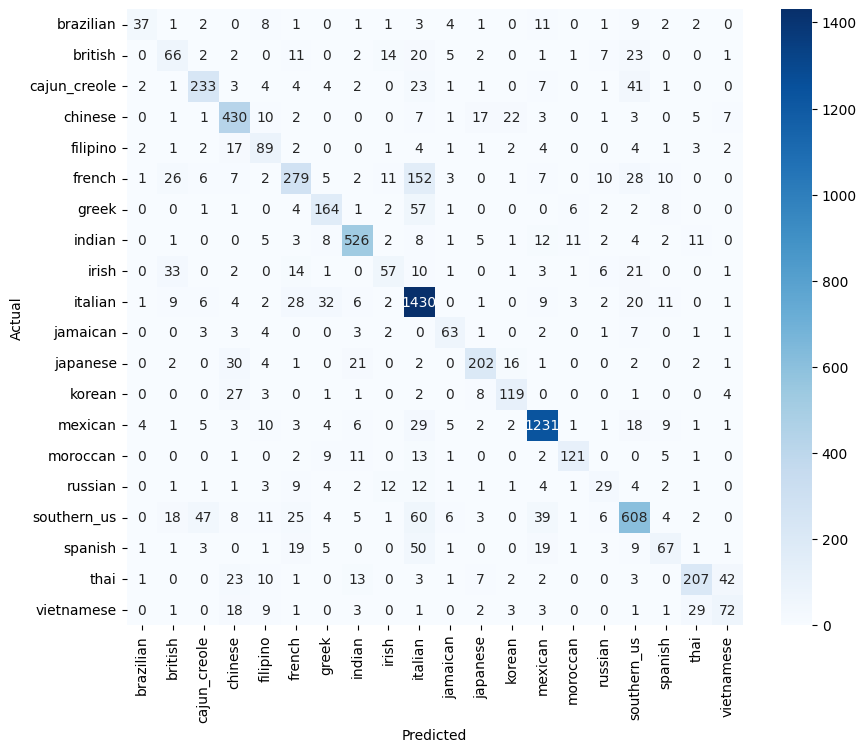

In [86]:
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names, 
            square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [87]:
sentence_vectorized = text_vectorizor(sentences)

In [89]:
sentence_vectorized[:5]

<tf.Tensor: shape=(5, 41), dtype=int64, numpy=
array([[ 327,  140,   14,  129,  350,   19,    5,    2,  104,   26,   77,
         519,   50,  201,   11,  284,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [ 163,   17,    6,    2,    3,   19,    6,   14,    2,   73,   27,
          20,   19,   76,   37,  283,   31,   33,    4,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [  27,    2,    3,  177,   74,    4,   20,   63, 1578,   12,   89,
           5,   21,   76,   26,   40,    8,   18,   12,  722,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [  15,   33,    4,  202,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0

In [118]:
# Callbacks

def tensorboard_cb(dirpath, model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join(dirpath, 
                                                       model_name, 
                                                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

def checkpoint_cb(dirpath, model_name, save_format=None, save_weights=False):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(dirpath, model_name + save_format), 
                                              save_best_only=True, 
                                              save_weights_only=save_weights,
                                              monitor="val_loss",
                                              verbose=1)

def early_stopping_cb(patience):
    return tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                            restore_best_weights=True, 
                                            patience=patience,
                                            verbose=1)

def reduce_lr_cb(patience, factor):
    return tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                patience=patience, 
                                                factor=factor, 
                                                min_lr=1e-7,
                                                verbose=1)

def lr_scheduler_cb(lr_init, lr_div):
    return tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr_init * 10 ** (epoch/lr_div))

In [93]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(41,), dtype=tf.float32)
x = text_embedding(inputs)
x = layers.LSTM(60, return_sequences=True)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(50, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4")

In [94]:
model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4_history = model_4.fit(sentence_vectorized,
                              targets,
                              epochs=50,
                              callbacks=[checkpoint_cb(CHECKPOINT_PATH, model_4.name, save_format=SAVE_FORMAT),
                                         tensorboard_cb(LOGS_PATH, model_4.name),
                                         early_stopping_cb(5),
                                         reduce_lr_cb(3, 0.1)])

Epoch 1/50
1243/1243 [==============================] - ETA: 0s - loss: 1.0194 - accuracy: 0.7016
Epoch 1: loss improved from inf to 1.01944, saving model to h5_models/recipe\model_4.h5
1243/1243 [==============================] - 20s 13ms/step - loss: 1.0194 - accuracy: 0.7016 - lr: 0.0010
Epoch 2/50
1240/1243 [============================>.] - ETA: 0s - loss: 0.7448 - accuracy: 0.7771
Epoch 2: loss improved from 1.01944 to 0.74473, saving model to h5_models/recipe\model_4.h5
1243/1243 [==============================] - 17s 13ms/step - loss: 0.7447 - accuracy: 0.7771 - lr: 0.0010
Epoch 3/50
1242/1243 [============================>.] - ETA: 0s - loss: 0.6863 - accuracy: 0.7948
Epoch 3: loss improved from 0.74473 to 0.68663, saving model to h5_models/recipe\model_4.h5
1243/1243 [==============================] - 17s 14ms/step - loss: 0.6866 - accuracy: 0.7948 - lr: 0.0010
Epoch 4/50
1240/1243 [============================>.] - ETA: 0s - loss: 0.6458 - accuracy: 0.8073
Epoch 4: loss impr

In [95]:
test_dataset = pd.read_json("../dataset/nlp/whats-cooking-kernels-only/test.json")
test_dataset.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [96]:
test_dataset.ingredients = [" ".join(text) for text in test_dataset.ingredients]

In [97]:
test_sentences_vectorized = text_vectorizor(test_dataset.ingredients.to_numpy())

In [98]:
test_sentences_vectorized_tensor = tf.data.Dataset.from_tensor_slices(test_sentences_vectorized).batch(32).prefetch(tf.data.AUTOTUNE)

In [99]:
test_sentences_vectorized_tensor

<PrefetchDataset element_spec=TensorSpec(shape=(None, 41), dtype=tf.int64, name=None)>

In [103]:
model_4_loaded = tf.keras.models.load_model(CHECKPOINT_PATH + model_4.name + ".h5")

In [114]:
test_preds = tf.argmax(model_4_loaded.predict(test_sentences_vectorized_tensor), axis=1)
test_preds

<tf.Tensor: shape=(9944,), dtype=int64, numpy=array([ 1, 16,  9, ...,  9, 16, 13], dtype=int64)>

In [109]:
test_preds_class = [class_names[i] for i in np.array(test_preds)]
test_preds_class

['british',
 'southern_us',
 'italian',
 'cajun_creole',
 'italian',
 'southern_us',
 'spanish',
 'chinese',
 'mexican',
 'irish',
 'italian',
 'greek',
 'indian',
 'italian',
 'chinese',
 'spanish',
 'jamaican',
 'southern_us',
 'mexican',
 'southern_us',
 'japanese',
 'indian',
 'moroccan',
 'vietnamese',
 'italian',
 'southern_us',
 'vietnamese',
 'japanese',
 'italian',
 'italian',
 'mexican',
 'thai',
 'indian',
 'japanese',
 'chinese',
 'mexican',
 'russian',
 'indian',
 'indian',
 'cajun_creole',
 'cajun_creole',
 'chinese',
 'french',
 'mexican',
 'italian',
 'italian',
 'spanish',
 'indian',
 'indian',
 'chinese',
 'italian',
 'vietnamese',
 'indian',
 'filipino',
 'italian',
 'chinese',
 'italian',
 'japanese',
 'chinese',
 'cajun_creole',
 'french',
 'mexican',
 'filipino',
 'korean',
 'mexican',
 'spanish',
 'vietnamese',
 'thai',
 'italian',
 'mexican',
 'french',
 'indian',
 'chinese',
 'thai',
 'indian',
 'japanese',
 'indian',
 'mexican',
 'southern_us',
 'greek',
 'chi

In [110]:
results_df = pd.DataFrame({"id": list(test_dataset.id),
                          "cuisine": list(test_preds_class)})

results_df

,id,cuisine
0,18009,british
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
...,...,...
9939,30246,french
9940,36028,southern_us
9941,22339,italian
9942,42525,southern_us


In [111]:
results_df.to_csv("submission.csv", index=False)

In [112]:
test_dataset[:10]

,id,ingredients
0,18009,baking powder eggs all-purpose flour raisins m...
1,28583,sugar egg yolks corn starch cream of tartar ba...
2,41580,sausage links fennel bulb fronds olive oil cub...
3,29752,meat cuts file powder smoked sausage okra shri...
4,35687,ground black pepper salt sausage casings leeks...
5,38527,baking powder all-purpose flour peach slices c...
6,19666,grape juice orange white zinfandel
7,41217,ground ginger white pepper green onions orange...
8,28753,diced onions taco seasoning mix all-purpose fl...
9,22659,eggs cherries dates dark muscovado sugar groun...


In [116]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(41,), dtype=tf.float32)
x = text_embedding(inputs)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.3))(x)
x = layers.Bidirectional(layers.LSTM(128, dropout=0.3))(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5")

In [117]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 embedding (Embedding)       (None, 41, 128)           381184    
                                                                 
 bidirectional (Bidirectiona  (None, 41, 256)          263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 tf.nn.silu (TFOpLambda)     (None, 512)               0   

In [119]:
model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

model_5_history = model_5.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=30,
                              callbacks=[tensorboard_cb(LOGS_PATH, model_5.name),
                                         checkpoint_cb(CHECKPOINT_PATH, model_5.name, save_format=SAVE_FORMAT),
                                         early_stopping_cb(5),
                                         reduce_lr_cb(3, 0.1)])

Epoch 1/30
994/995 [============================>.] - ETA: 0s - loss: 0.9759 - accuracy: 0.7124
Epoch 1: val_loss improved from inf to 0.73894, saving model to h5_models/recipe\model_5.h5
995/995 [==============================] - 68s 54ms/step - loss: 0.9760 - accuracy: 0.7124 - val_loss: 0.7389 - val_accuracy: 0.7835 - lr: 0.0010
Epoch 2/30
995/995 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.7787
Epoch 2: val_loss did not improve from 0.73894
995/995 [==============================] - 50s 50ms/step - loss: 0.7626 - accuracy: 0.7787 - val_loss: 0.7417 - val_accuracy: 0.7829 - lr: 0.0010
Epoch 3/30
995/995 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.7980
Epoch 3: val_loss improved from 0.73894 to 0.71224, saving model to h5_models/recipe\model_5.h5
995/995 [==============================] - 53s 54ms/step - loss: 0.6965 - accuracy: 0.7980 - val_loss: 0.7122 - val_accuracy: 0.7979 - lr: 0.0010
Epoch 4/30
995/995 [===================

In [120]:
model_5_preds = tf.argmax(model_5.predict(val_dataset), axis=1)
model_5_results = evaluate_classification_model(val_targets, model_5_preds)
model_5_results

{'acc': 0.7988686360779385,
 'pre': 0.8110413088210507,
 'rec': 0.7988686360779385,
 'f1': 0.7965137215743928}

In [121]:
model_5.evaluate(train_dataset), model_5.evaluate(val_dataset)

249/249 [==============================] - 4s 17ms/step - loss: 0.7033 - accuracy: 0.7989


([0.49984315037727356, 0.849398136138916],
 [0.7032963633537292, 0.7988686561584473])

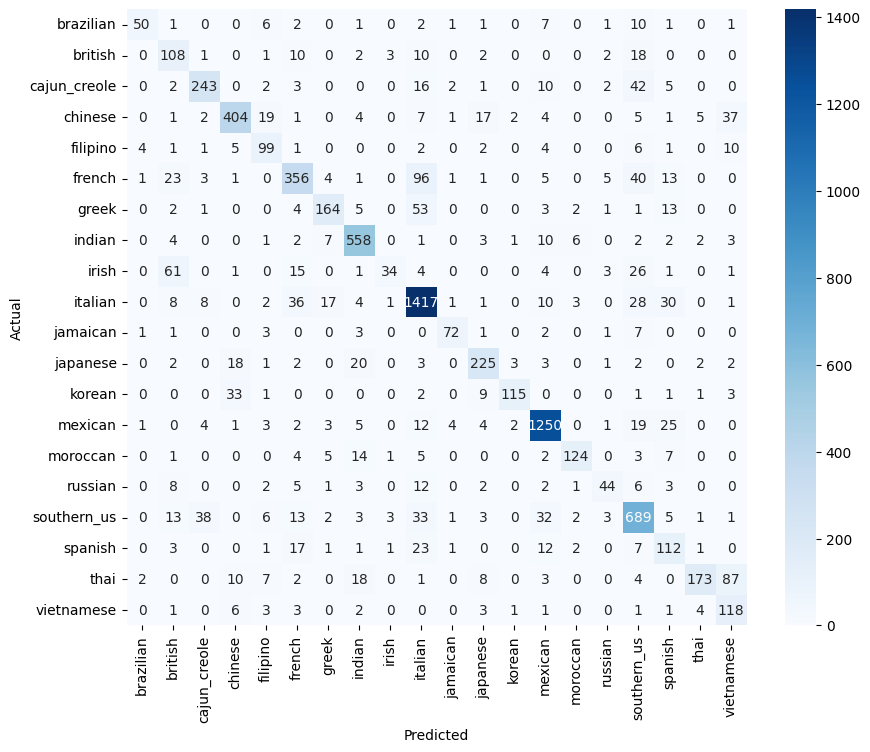

In [123]:
cm_5 = confusion_matrix(val_targets, model_5_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_5, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [126]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(41,), dtype=tf.float32)
x = text_embedding(inputs)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.3))(x)
x = layers.Bidirectional(layers.LSTM(128, dropout=0.3))(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5")

model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_5_history = model_5.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=30,
                              callbacks=[checkpoint_cb(CHECKPOINT_PATH, model_5.name + "_adam", save_format=SAVE_FORMAT),
                                         tensorboard_cb(LOGS_PATH, model_5.name + "_adam"),
                                         early_stopping_cb(5),
                                         reduce_lr_cb(3, 0.1)])

Epoch 1/30
994/995 [============================>.] - ETA: 0s - loss: 0.9372 - accuracy: 0.7237
Epoch 1: val_loss improved from inf to 0.72783, saving model to h5_models/recipe\model_5_adam.h5
995/995 [==============================] - 71s 55ms/step - loss: 0.9372 - accuracy: 0.7236 - val_loss: 0.7278 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 2/30
994/995 [============================>.] - ETA: 0s - loss: 0.6968 - accuracy: 0.7970
Epoch 2: val_loss improved from 0.72783 to 0.70243, saving model to h5_models/recipe\model_5_adam.h5
995/995 [==============================] - 48s 48ms/step - loss: 0.6966 - accuracy: 0.7970 - val_loss: 0.7024 - val_accuracy: 0.7941 - lr: 0.0010
Epoch 3/30
995/995 [==============================] - ETA: 0s - loss: 0.6232 - accuracy: 0.8171
Epoch 3: val_loss did not improve from 0.70243
995/995 [==============================] - 49s 49ms/step - loss: 0.6232 - accuracy: 0.8171 - val_loss: 0.7315 - val_accuracy: 0.7952 - lr: 0.0010
Epoch 4/30
994/995 [=========

In [127]:
model_5_preds = tf.argmax(model_5.predict(val_dataset), axis=1)
model_5_results = evaluate_classification_model(val_targets, model_5_preds)
model_5_results

{'acc': 0.7940917661847895,
 'pre': 0.7952437067456694,
 'rec': 0.7940917661847895,
 'f1': 0.7907266209211525}

In [128]:
model_5.evaluate(train_dataset), model_5.evaluate(val_dataset)

249/249 [==============================] - 4s 16ms/step - loss: 0.7024 - accuracy: 0.7941


([0.5302223563194275, 0.8411012291908264],
 [0.7024293541908264, 0.7940917611122131])

In [129]:
print(model_5_results)

{'acc': 0.7940917661847895, 'pre': 0.7952437067456694, 'rec': 0.7940917661847895, 'f1': 0.7907266209211525}
